In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go

In [2]:
train_raw = pd.read_csv('train.csv', index_col = 'Date', parse_dates = True)

In [3]:
stores_raw = pd.read_csv('stores.csv')

In [4]:
features_raw = pd.read_csv('features.csv', index_col = 'Date', parse_dates = True)

In [5]:
test_raw = pd.read_csv('test.csv', index_col = 'Date', parse_dates = True)

In [6]:
names_raw = pd.read_csv('Walmart_Department_Name.csv')

In [7]:
stores_raw.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [8]:
stores = stores_raw.copy()

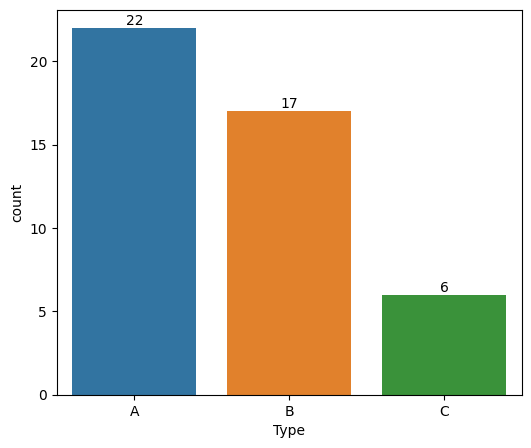

In [9]:
fig, ax = plt.subplots(figsize = (6,5))
sns.countplot(x = stores.Type)
for i, j in enumerate(stores.Type.value_counts()):    
    plt.text(x = i, y = j + 0.2, s = j, ha = 'center');

In [10]:
stores.groupby('Type')['Size'].agg(['max', 'min']) # Type is not labelled based on Size binning, could be just max or mean size

max    min
Type               
A     219622  39690
B     140167  34875
C      42988  39690

In [11]:
stores.groupby('Type')['Size'].mean()

Type
A    177247.727273
B    101190.705882
C     40541.666667
Name: Size, dtype: float64

<Axes: xlabel='Type'>

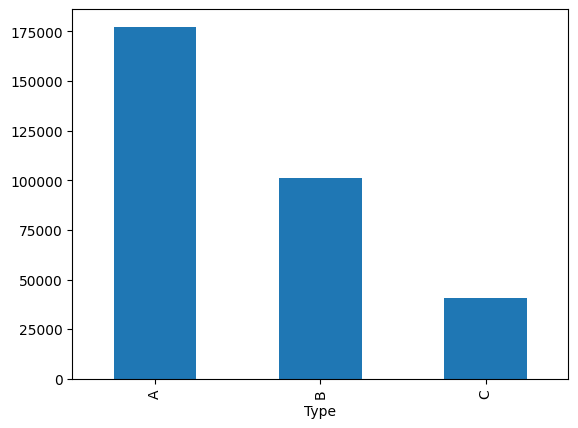

In [12]:
stores.groupby('Type')['Size'].mean().plot(kind = 'bar') # Type explains the average size of the store

![Walmart_Type](Walmart_Type.png)

In [13]:
train = train_raw.copy()

In [14]:
train.Dept.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [15]:
names = names_raw.copy()
names.Id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [16]:
names

Id                                 Name
0    1                    Candy and Tobacco
1    2                    Health and Beauty
2    3                           Stationery
3    4                          Paper Goods
4    5                     Media and Gaming
..  ..                                  ...
94  95   DSD Grocery, Snacks, and Beverages
95  96                               Liquor
96  97                        Packaged Deli
97  98                               Bakery
98  99          Store Supplies (non-retail)

[99 rows x 2 columns]

In [17]:
dept_names = pd.merge(train, names, left_on = 'Dept', right_on = 'Id').drop('Id', axis = 1)

In [18]:
dept_names.head()

Store  Dept  Weekly_Sales  IsHoliday                Name
0      1     1      24924.50      False   Candy and Tobacco
1      1     1      46039.49       True   Candy and Tobacco
2      1     1      41595.55      False   Candy and Tobacco
3      1     1      19403.54      False   Candy and Tobacco
4      1     1      21827.90      False   Candy and Tobacco

In [19]:
dept_names = pd.merge(dept_names, stores, on = 'Store')

In [20]:
dept_names

Store  Dept  Weekly_Sales  IsHoliday                Name Type    Size
0           1     1      24924.50      False   Candy and Tobacco    A  151315
1           1     1      46039.49       True   Candy and Tobacco    A  151315
2           1     1      41595.55      False   Candy and Tobacco    A  151315
3           1     1      19403.54      False   Candy and Tobacco    A  151315
4           1     1      21827.90      False   Candy and Tobacco    A  151315
...       ...   ...           ...        ...                 ...  ...     ...
421565     45    98        508.37      False              Bakery    B  118221
421566     45    98        628.10      False              Bakery    B  118221
421567     45    98       1061.02      False              Bakery    B  118221
421568     45    98        760.01      False              Bakery    B  118221
421569     45    98       1076.80      False              Bakery    B  118221

[421570 rows x 7 columns]

In [21]:
stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [22]:
test = stores[['Type', 'Size']].groupby('Type').groups
test

{'A': [0, 1, 3, 5, 7, 10, 12, 13, 18, 19, 23, 25, 26, 27, 30, 31, 32, 33, 35, 38, 39, 40], 'B': [2, 4, 6, 8, 9, 11, 14, 15, 16, 17, 20, 21, 22, 24, 28, 34, 44], 'C': [29, 36, 37, 41, 42, 43]}

In [23]:
from scipy.stats import f_oneway

fvalue, pvalue = f_oneway(stores.loc[test['A']]['Size'],stores.loc[test['B']]['Size'],stores.loc[test['C']]['Size'])
print(pvalue)

1.4502004628034621e-09


In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
model = ols('Size ~ Type', data = dept_names).fit()  # Model formula
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq        df              F  PR(>F)
Type      1.039550e+15       2.0  414913.833454     0.0
Residual  5.281097e+14  421567.0            NaN     NaN


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

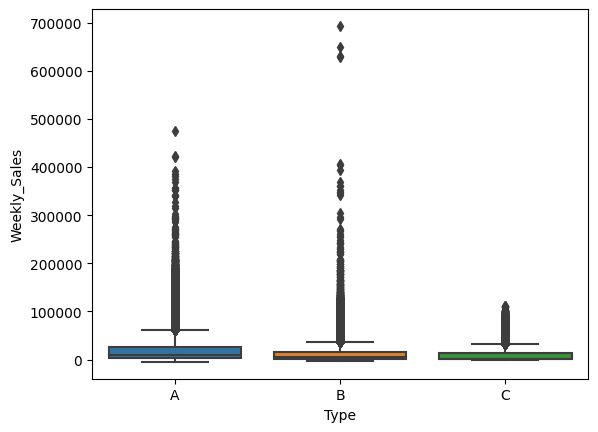

In [26]:
sns.boxplot(data = dept_names, y = 'Weekly_Sales', x = 'Type')

In [27]:
model = ols('Weekly_Sales ~ Type',    # Model formula
            data = dept_names).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq        df            F  PR(>F)
Type      7.725220e+12       2.0  7764.426217     0.0
Residual  2.097192e+14  421567.0          NaN     NaN


In [120]:
train_exc_holidays = train.drop(holidays.index)

In [121]:
train_exc_holidays.head()

Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False
2010-03-12      1     1      21043.39      False

<Axes: xlabel='Date'>

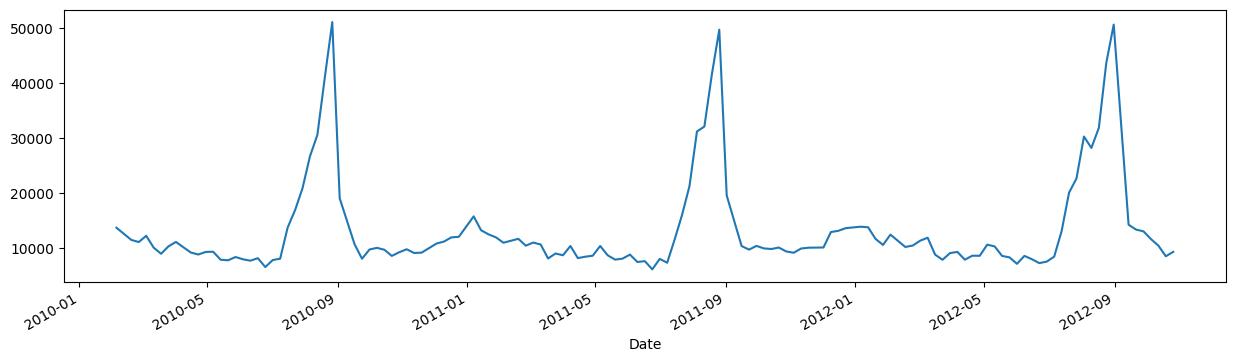

In [122]:
train_exc_holidays.loc[(train_exc_holidays.Store == 1) & (train_exc_holidays.Dept == 3)]['Weekly_Sales'].plot(figsize = (15,4))

In [31]:
x = dept_names.groupby(['Store','Dept']).count()

In [32]:
x

Weekly_Sales  IsHoliday  Name  Type  Size
Store Dept                                           
1     1              143        143   143   143   143
      2              143        143   143   143   143
      3              143        143   143   143   143
      4              143        143   143   143   143
      5              143        143   143   143   143
...                  ...        ...   ...   ...   ...
45    94             134        134   134   134   134
      95             143        143   143   143   143
      96               2          2     2     2     2
      97             143        143   143   143   143
      98             135        135   135   135   135

[3331 rows x 5 columns]

In [33]:
x1 = x.reset_index(level = 'Dept')['Dept'].value_counts()

In [34]:
x1

1     45
32    45
38    45
40    45
42    45
      ..
37    20
50    14
39     5
43     5
65     1
Name: Dept, Length: 81, dtype: int64

In [35]:
x2 = pd.merge(x1, names, left_on = x1.index, right_on = names.Id).drop('key_0', axis = 1).rename(columns = {'Dept':'Count', 'Id':'Dept'})
x2.head()

Count  Dept                    Name
0     45     1       Candy and Tobacco
1     45    32                 Jewelry
2     45    38   Prescription Pharmacy
3     45    40            OTC Pharmacy
4     45    42      Motor Oil (Sub 10)

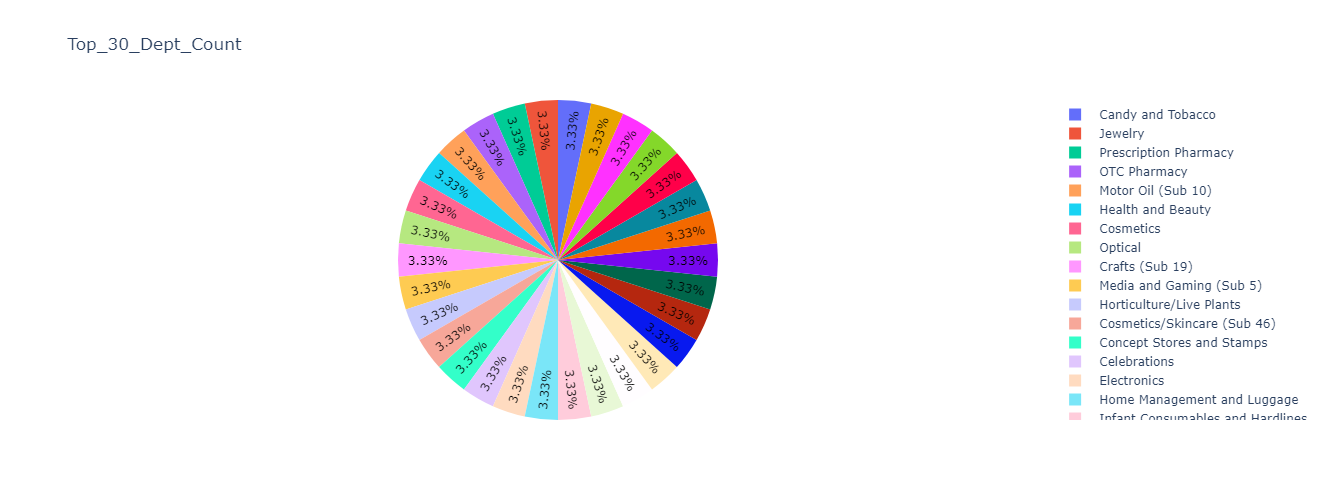

In [36]:
fig = px.pie(x2[:30], values=x2[:30].Count, names=x2[:30].Name, title='Top_30_Dept_Count')
fig.update_layout(width = 1300, height = 500, paper_bgcolor="white")
fig.update_traces(textfont_color = '#00040a')
# fig.add_trace(go.Scatter(textfont=dict(family="sans serif", size=18, color="black")))
fig.update_traces(textfont_color='black')
fig.show()

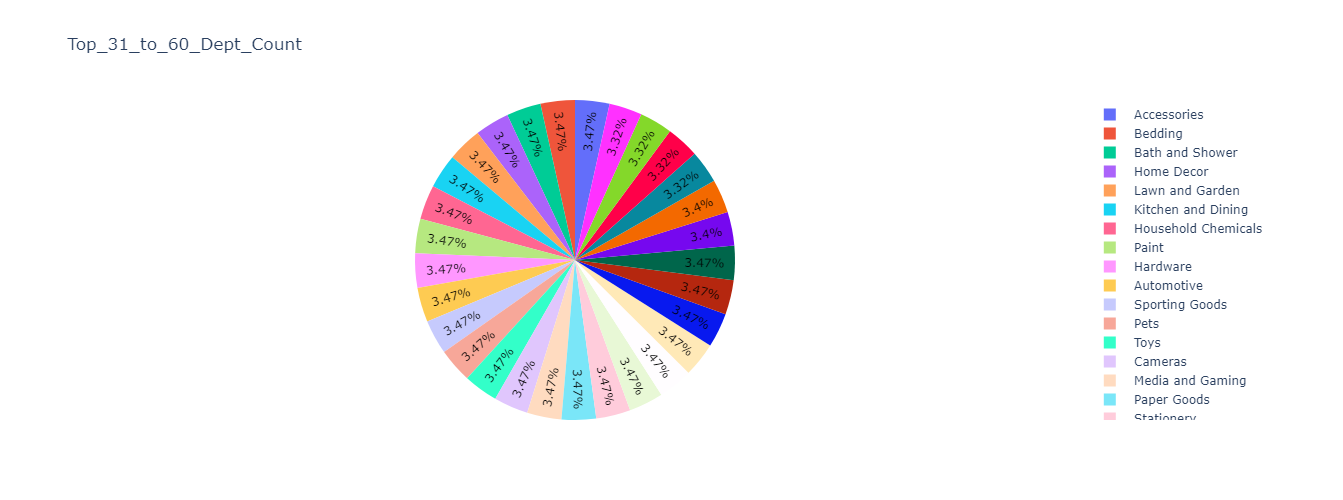

In [37]:
fig = px.pie(x2[31:60], values=x2[31:60].Count, names=x2[31:60].Name, title='Top_31_to_60_Dept_Count')
fig.update_layout(width = 1300, height = 500, paper_bgcolor="white")
fig.update_traces(textfont_color = '#00040a')
# fig.add_trace(go.Scatter(textfont=dict(family="sans serif", size=18, color="black")))
fig.update_traces(textfont_color='black')
fig.show()

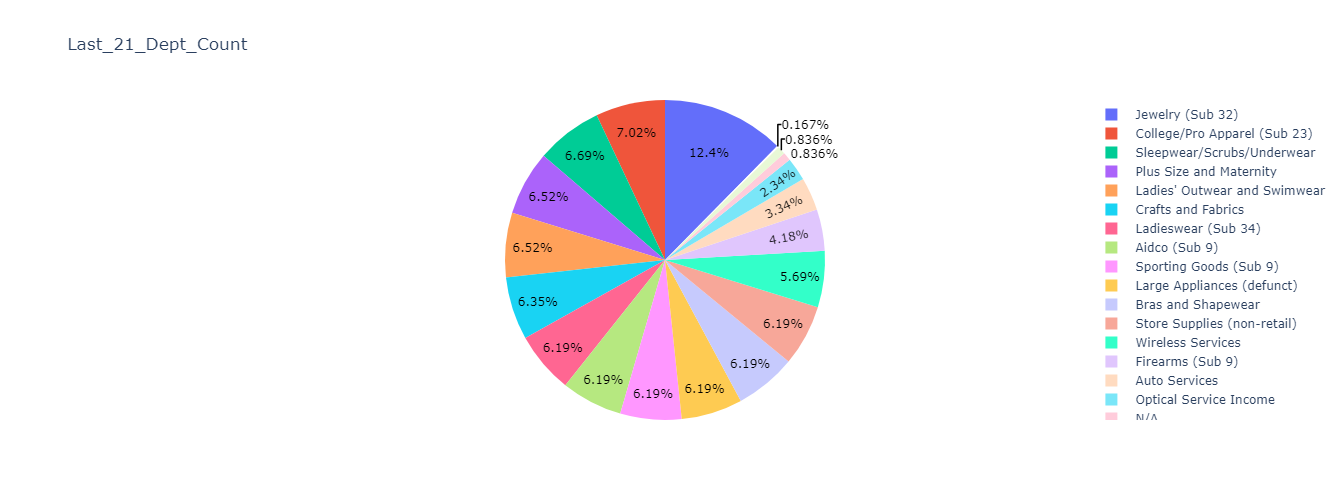

In [38]:
fig = px.pie(x2[61:], values=x2[61:].Count, names=x2[61:].Name, title='Last_21_Dept_Count')
fig.update_layout(width = 1300, height = 500, paper_bgcolor="white")
fig.update_traces(textfont_color = '#00040a')
# fig.add_trace(go.Scatter(textfont=dict(family="sans serif", size=18, color="black")))
fig.update_traces(textfont_color='black')
fig.show()

In [39]:
name_count = dept_names.Name.value_counts()[:20]
name_count

 Crafts (Sub 19)                       11739
 Candy and Tobacco                      6435
 Prescription Pharmacy                  6435
 Health and Beauty                      6435
 Cosmetics                              6435
 Celebrations                           6435
 Infant Consumables and Hardlines       6435
 Books and Magazines                    6435
 Commercial Bread                       6435
 Impulse Merchandise and Batteries      6435
 Dairy                                  6435
 Lawn and Garden                        6435
 Kitchen and Dining                     6435
 Household Chemicals                    6435
 Automotive                             6435
 Frozen Food                            6435
 Pets                                   6435
 Toys                                   6435
 Dry Grocery                            6435
 DSD Grocery, Snacks, and Beverages     6435
Name: Name, dtype: int64

In [40]:
dept_names.loc[dept_names.Type == 'A']['Name'].unique().shape

(79,)

In [41]:
dept_names.loc[dept_names.Type == 'B']['Name'].unique().shape

(78,)

In [42]:
dept_names.loc[dept_names.Type == 'C']['Name'].unique()

array([' Candy and Tobacco', ' Health and Beauty', ' Stationery',
       ' Paper Goods', ' Media and Gaming', ' Cameras', ' Toys', ' Pets',
       ' Sporting Goods', ' Automotive', ' Hardware', ' Paint',
       ' Household Chemicals', ' Kitchen and Dining', ' Lawn and Garden',
       ' Home Decor', ' Seasonal', ' Crafts and Fabrics',
       ' Bath and Shower', ' Books and Magazines', ' Bedding',
       ' Menswear', ' Boyswear', ' Shoes', ' Infant Apparel',
       " Ladies' Socks", ' Hosiery', ' Sleepwear/Scrubs/Underwear',
       ' Accessories', ' Jewelry', ' Girlswear', ' Ladieswear',
       ' Prescription Pharmacy', ' OTC Pharmacy',
       ' College/Pro Apparel (Sub 23)', ' Motor Oil (Sub 10)',
       ' Crafts (Sub 19)', ' Cosmetics', ' Optical',
       ' Media and Gaming (Sub 5)', ' Horticulture/Live Plants',
       ' Cosmetics/Skincare (Sub 46)', ' Concept Stores and Stamps',
       ' Celebrations', ' Electronics', ' Home Management and Luggage',
       ' Infant Consumables and Har

<Axes: ylabel='Frequency'>

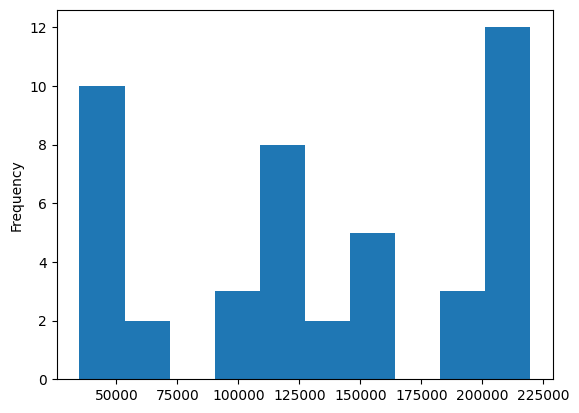

In [43]:
stores.Size.plot(kind = 'hist', bins = 10)

In [44]:
dept_names.head()

Store  Dept  Weekly_Sales  IsHoliday                Name Type    Size
0      1     1      24924.50      False   Candy and Tobacco    A  151315
1      1     1      46039.49       True   Candy and Tobacco    A  151315
2      1     1      41595.55      False   Candy and Tobacco    A  151315
3      1     1      19403.54      False   Candy and Tobacco    A  151315
4      1     1      21827.90      False   Candy and Tobacco    A  151315

In [45]:
dept_sales = dept_names.groupby(['Dept', 'Name'])['Weekly_Sales'].sum().reset_index(level = 'Name').sort_values('Weekly_Sales', ascending = True)
dept_sales.head()

Name  Weekly_Sales
Dept                                       
47           Jewelry (Sub 32)      -4962.93
43               Toys (Sub 7)         14.32
39                        N/A        177.98
78        Ladieswear (Sub 34)       1714.71
51     Sporting Goods (Sub 9)      30572.83

In [133]:
dept_sales.iloc[-10:]

Name  Weekly_Sales
Dept                                                   
8                                    Pets  1.942808e+08
13                    Household Chemicals  1.973216e+08
91                            Frozen Food  2.167817e+08
2                       Health and Beauty  2.806112e+08
40                           OTC Pharmacy  2.889360e+08
90                                  Dairy  2.910685e+08
72                            Electronics  3.057252e+08
38                  Prescription Pharmacy  3.931181e+08
95     DSD Grocery, Snacks, and Beverages  4.493202e+08
92                            Dry Grocery  4.839433e+08

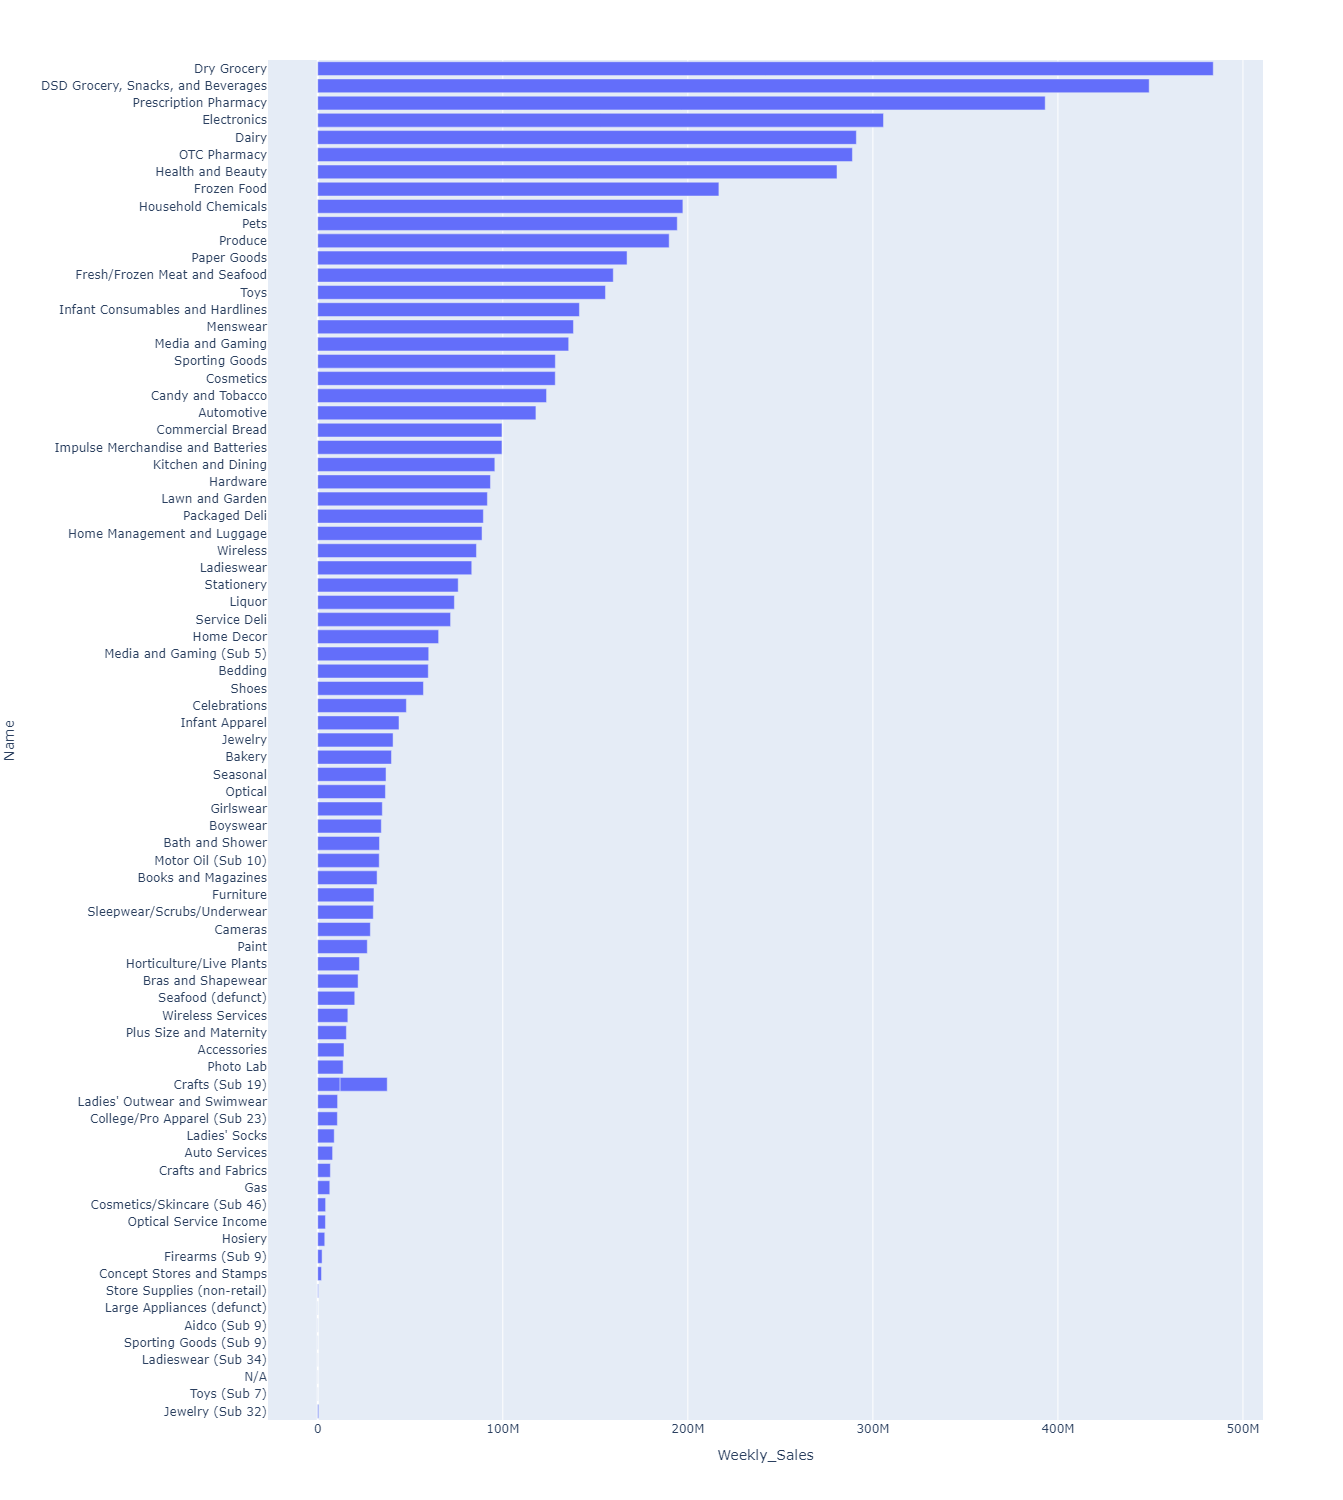

In [46]:
fig = px.bar(data_frame = dept_sales, y = dept_sales.Name, x = dept_sales.Weekly_Sales)
fig.update_layout(width = 1300, height = 1500, paper_bgcolor="white")

In [47]:
dept_sales_C = dept_names.loc[dept_names.Type == 'C'].groupby(['Dept', 'Name'])['Weekly_Sales'].sum().reset_index(level = 'Name').sort_values('Weekly_Sales', ascending = True)

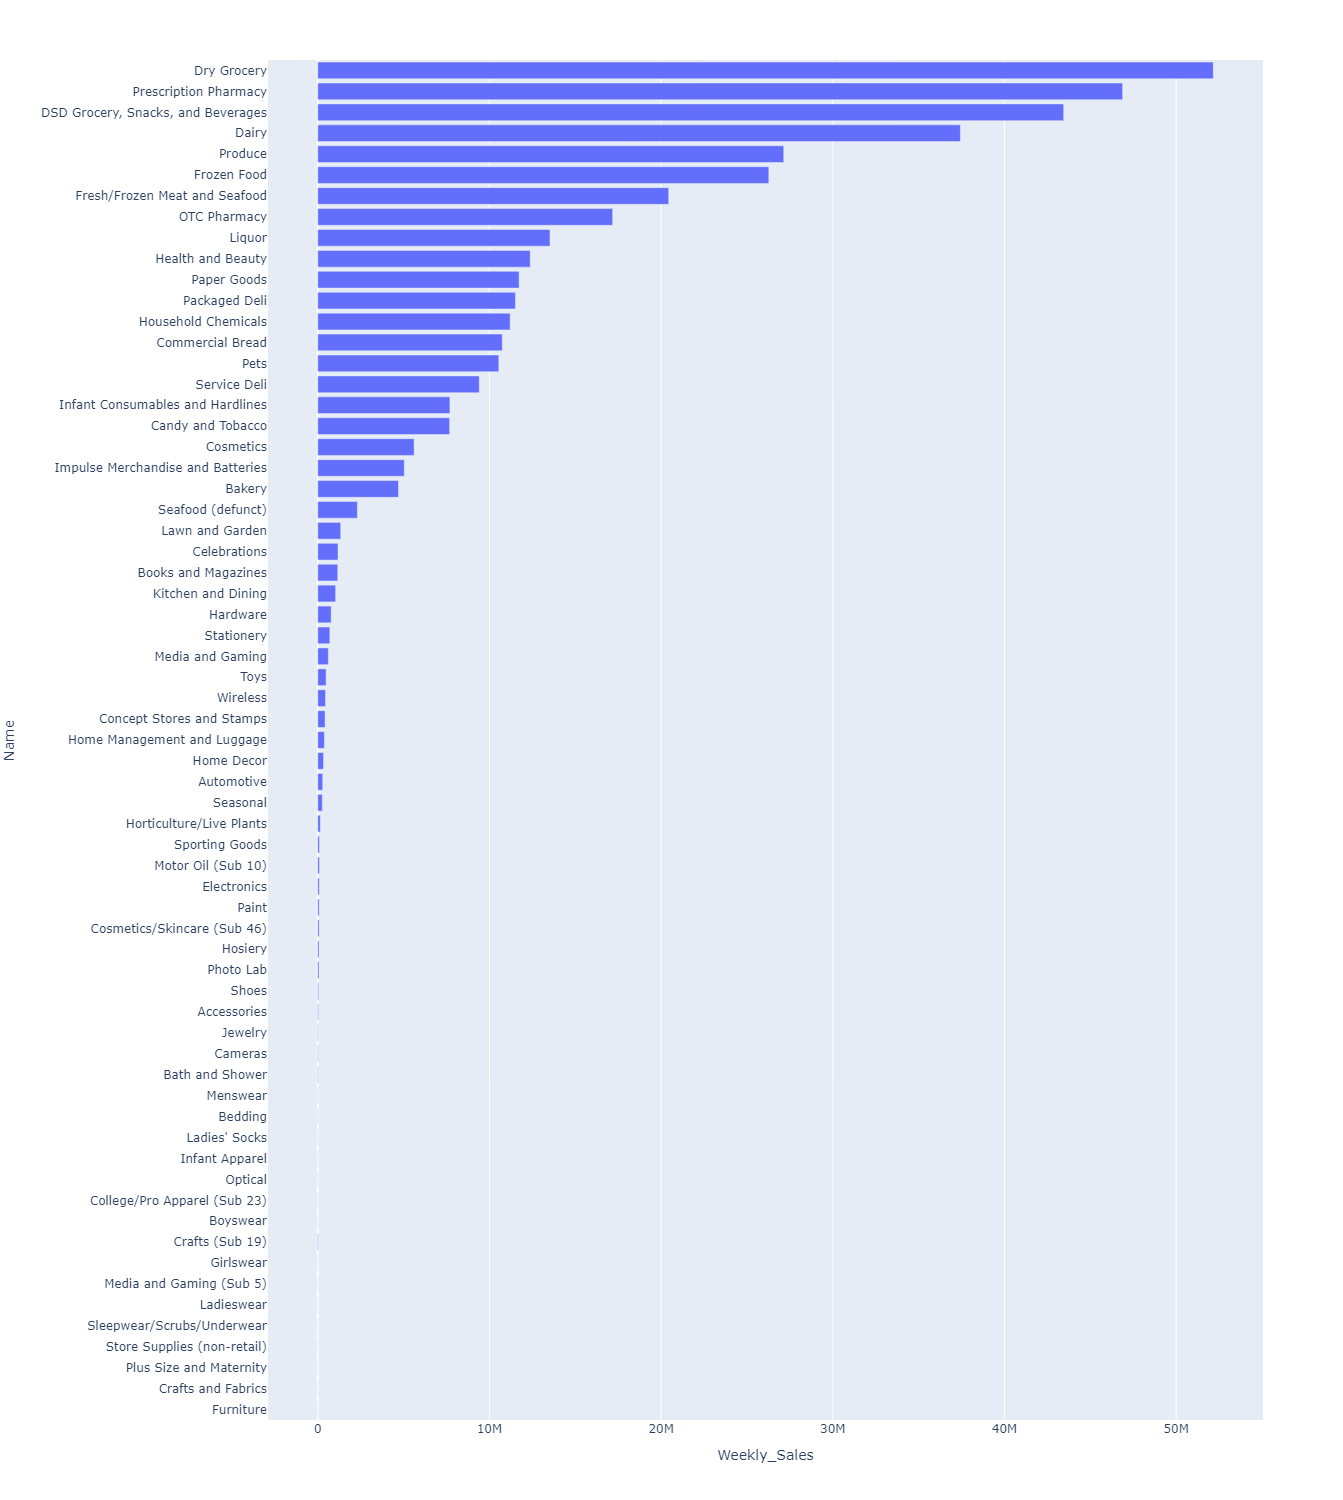

In [48]:
fig = px.bar(data_frame = dept_sales_C, y = dept_sales_C.Name, x = dept_sales_C.Weekly_Sales)
fig.update_layout(width = 1300, height = 1500, paper_bgcolor="white")

In [49]:
train.head()

Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False

In [50]:
def store1_trend(department):
    fig, ax = plt.subplots(figsize = (16, 4))
    temp = train.loc[(train.Store == 1) & (train.Dept == department)]['Weekly_Sales']
    sns.lineplot(x = temp.index, y = temp.values)

In [51]:
widgets.interact(store1_trend, department = train.loc[train.Store == 1]['Dept'].unique());

interactive(children=(Dropdown(description='department', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

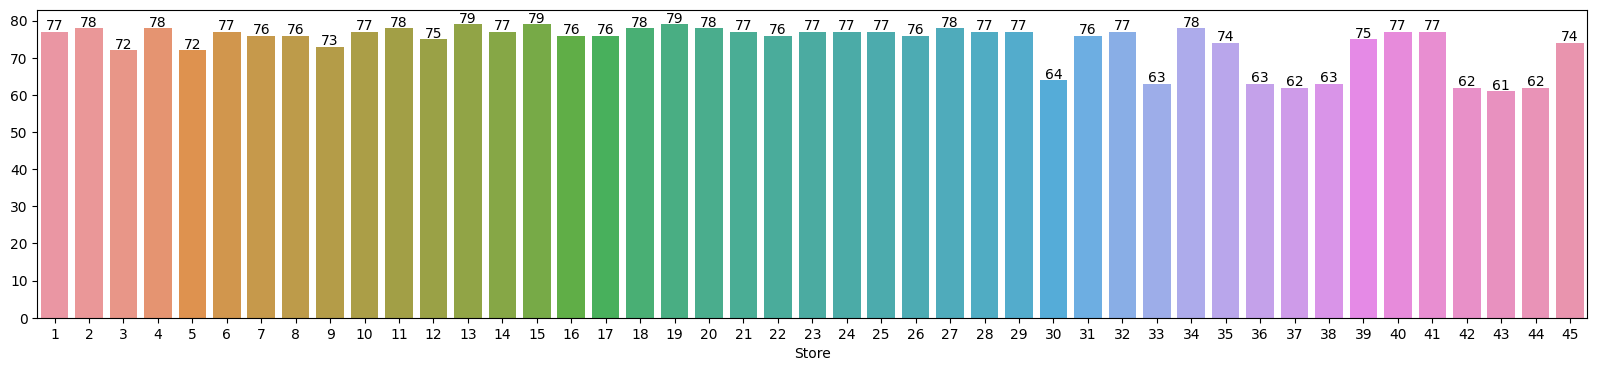

In [52]:
no_of_dept = train.groupby(['Store'])['Dept'].nunique()
fig, ax = plt.subplots(figsize = (20,4))
sns.barplot(x = no_of_dept.index, y = no_of_dept.values)
for i, j in enumerate(no_of_dept):    
    plt.text(x = i, y = j + 0.5, s = j, ha = 'center');

In [53]:
no_of_dept.sum() * 33

109923

In [54]:
no_of_dept.describe()

count    45.000000
mean     74.022222
std       5.654800
min      61.000000
25%      74.000000
50%      77.000000
75%      77.000000
max      79.000000
Name: Dept, dtype: float64

In [55]:
no_of_dept = no_of_dept.reset_index()

In [56]:
no_of_dept.head()

Store  Dept
0      1    77
1      2    78
2      3    72
3      4    78
4      5    72

In [57]:
store_dept = pd.merge(no_of_dept, stores, on = 'Store')

In [58]:
store_dept.head()

Store  Dept Type    Size
0      1    77    A  151315
1      2    78    A  202307
2      3    72    B   37392
3      4    78    A  205863
4      5    72    B   34875

In [59]:
store_dept.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [60]:
store_dept.corr()

Store      Dept      Size
Store  1.000000 -0.512261 -0.244270
Dept  -0.512261  1.000000  0.768344
Size  -0.244270  0.768344  1.000000

In [61]:
store_dept.groupby('Type')['Dept'].mean()

Type
A    75.954545
B    75.647059
C    62.333333
Name: Dept, dtype: float64

In [62]:
store_dept.groupby('Type')['Dept'].agg(['max', 'min'])

max  min
Type          
A      79   63
B      79   72
C      64   61

In [63]:
store_weekly_sales = train.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()

In [64]:
store_weekly_sales.head()

Store       Date  Weekly_Sales
0      1 2010-02-05    1643690.90
1      1 2010-02-12    1641957.44
2      1 2010-02-19    1611968.17
3      1 2010-02-26    1409727.59
4      1 2010-03-05    1554806.68

In [65]:
features = features_raw[['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']]

In [66]:
features = features['2010-02-05':'2012-10-26']

In [67]:
print(features.shape)
print(store_weekly_sales.shape)

(6435, 6)
(6435, 3)


In [68]:
features.head()

Store  Temperature  Fuel_Price         CPI  Unemployment  \
Date                                                                   
2010-02-05      1        42.31       2.572  211.096358         8.106   
2010-02-12      1        38.51       2.548  211.242170         8.106   
2010-02-19      1        39.93       2.514  211.289143         8.106   
2010-02-26      1        46.63       2.561  211.319643         8.106   
2010-03-05      1        46.50       2.625  211.350143         8.106   

            IsHoliday  
Date                   
2010-02-05      False  
2010-02-12       True  
2010-02-19      False  
2010-02-26      False  
2010-03-05      False

In [69]:
holidays = pd.DataFrame({'Holiday': ['Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Super Bowl', 'Labor Day']},
                        index = train.loc[train.IsHoliday == True].index.unique())

In [70]:
overall = pd.merge(store_weekly_sales, features, left_on = ['Date', 'Store'], right_on = [features.index, 'Store'])

In [71]:
overall = overall.set_index('Date')

In [72]:
overall.head()

Store  Weekly_Sales  Temperature  Fuel_Price         CPI  \
Date                                                                   
2010-02-05      1    1643690.90        42.31       2.572  211.096358   
2010-02-12      1    1641957.44        38.51       2.548  211.242170   
2010-02-19      1    1611968.17        39.93       2.514  211.289143   
2010-02-26      1    1409727.59        46.63       2.561  211.319643   
2010-03-05      1    1554806.68        46.50       2.625  211.350143   

            Unemployment  IsHoliday  
Date                                 
2010-02-05         8.106      False  
2010-02-12         8.106       True  
2010-02-19         8.106      False  
2010-02-26         8.106      False  
2010-03-05         8.106      False

In [73]:
def overall_ts(store):
    fig, ax = plt.subplots(figsize = (16, 4))
    temp = overall.loc[overall.Store == store]['Weekly_Sales']
    sns.lineplot(x = temp.index, y = temp.values)
    plt.vlines(x = overall.loc[overall.IsHoliday == True].index, ymin = temp.min(), ymax = temp.max(), linestyles = 'dashed', color = 'grey', linewidth = 0.5)
    for i, j in zip(holidays.index, holidays.values):
        plt.text(x = i + pd.DateOffset(days = 3), y = temp.quantile(0.99), s = j[0], rotation = 90, fontsize = 'small', alpha = 1, color = 'red')

In [74]:
widgets.interact(overall_ts, store = overall.Store.unique());

interactive(children=(Dropdown(description='store', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

In [75]:
overall.head()

Store  Weekly_Sales  Temperature  Fuel_Price         CPI  \
Date                                                                   
2010-02-05      1    1643690.90        42.31       2.572  211.096358   
2010-02-12      1    1641957.44        38.51       2.548  211.242170   
2010-02-19      1    1611968.17        39.93       2.514  211.289143   
2010-02-26      1    1409727.59        46.63       2.561  211.319643   
2010-03-05      1    1554806.68        46.50       2.625  211.350143   

            Unemployment  IsHoliday  
Date                                 
2010-02-05         8.106      False  
2010-02-12         8.106       True  
2010-02-19         8.106      False  
2010-02-26         8.106      False  
2010-03-05         8.106      False

In [76]:
overall_pivot = pd.pivot_table(data = overall, values = 'Weekly_Sales', index = overall.index, columns = 'Store')
overall_pivot.head(2)

Store               1           2          3           4         5   \
Date                                                                  
2010-02-05  1643690.90  2136989.46  461622.22  2135143.87  317173.1   
2010-02-12  1641957.44  2137809.50  420728.96  2188307.39  311825.7   

Store               6          7           8          9           10  ...  \
Date                                                                  ...   
2010-02-05  1652635.10  496725.44  1004137.09  549505.55  2193048.75  ...   
2010-02-12  1606283.86  524104.92   994801.40  552677.48  2176028.52  ...   

Store              36         37         38          39          40  \
Date                                                                  
2010-02-05  467546.74  536006.73  358496.14  1230596.80  1001943.80   
2010-02-12  469563.70  529852.70  342214.90  1266229.07   955338.29   

Store               41         42         43         44         45  
Date                                                                
2010-02-05  1086533.18  543384.01  647029.28  281090.95  890689.51  
2010-02-12  1075656.34  575709.96  682918.99  286857.13  656988.64  

[2 rows x 45 columns]

In [77]:
# Same as overall.groupby('Date')
date_avg = overall_pivot.mean(axis = 1)

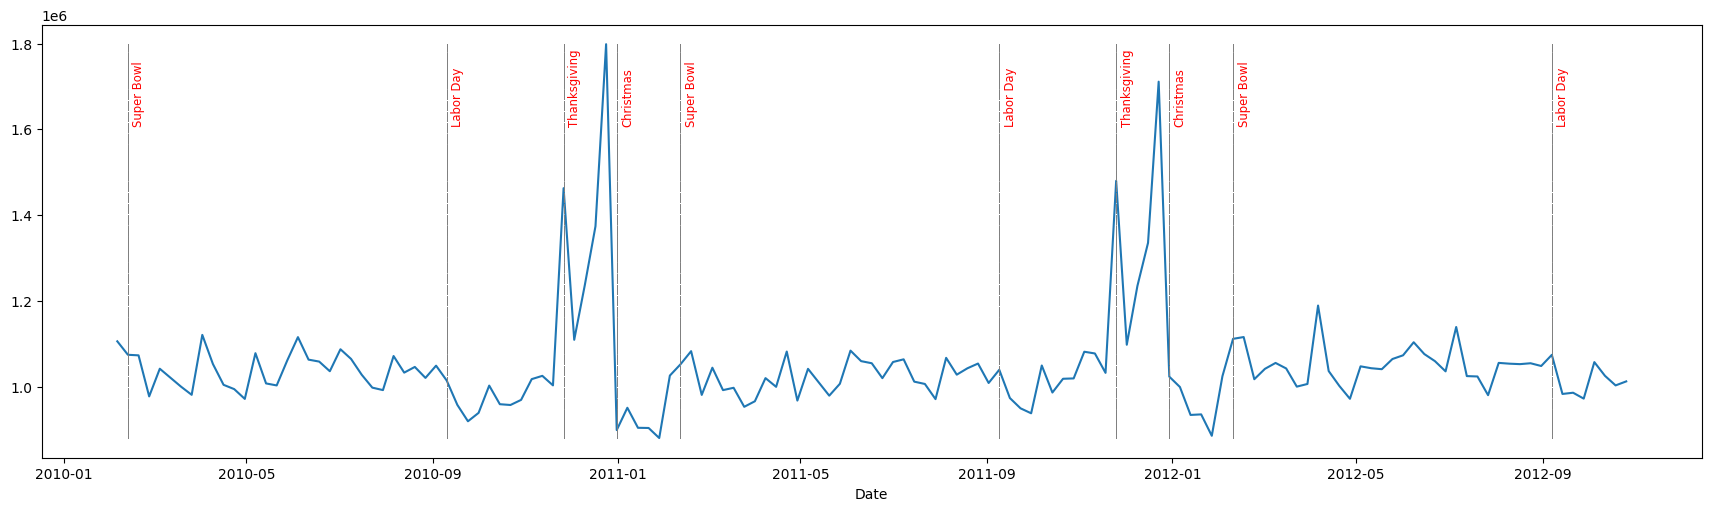

In [78]:
fig, ax = plt.subplots(figsize = (17, 5), layout = 'constrained')
sns.lineplot(x = date_avg.index, y = date_avg.values)
plt.vlines(x = overall.loc[overall.IsHoliday == True].index, ymin = date_avg.min(), ymax = date_avg.max(), linestyles = 'dashed', color = 'grey', linewidth = 0.5)
for i, j in zip(holidays.index, holidays.values):
    plt.text(x = i + pd.DateOffset(days = 3), y = date_avg.quantile(0.99), s = j[0], rotation = 90, fontsize = 'small', alpha = 1, color = 'red')

In [79]:
# What's the busiest holiday, 2nd busiest holiday, lowest sale day...

In [80]:
train.head()

Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False

In [81]:
# w1 = train.loc[(train.Store == 1) & (train.Dept == 1)]['Weekly_Sales'].resample('m').sum().to_frame()

In [82]:
monthly_trend = pd.DataFrame()

In [83]:
for i in train.Store.unique():
    for j in train.loc[train.Store == i]['Dept'].unique():
        x = train.loc[(train.Store == i) & (train.Dept == j)]['Weekly_Sales'].resample('m').sum().reset_index()
        x['Store'] = i
        x['Dept'] = j
        monthly_trend = pd.concat([monthly_trend, x], axis = 0, ignore_index = True)

In [84]:
monthly_trend.rename(columns = {'Weekly_Sales': 'Monthly_Sales'}, inplace = True)

In [85]:
monthly_trend['Month'] = monthly_trend.Date.apply(lambda x: f'{x.month_name()} {x.year}')

In [86]:
monthly_trend.set_index('Date', inplace = True)

In [87]:
def store1_monthly_trend(department):
    fig, ax = plt.subplots(figsize = (16, 4))
    y = monthly_trend.loc[(monthly_trend.Store == 1) & (monthly_trend.Dept == department)]['Monthly_Sales']
    x = monthly_trend.loc[(monthly_trend.Store == 1) & (monthly_trend.Dept == 1)]['Month']
    sns.lineplot(x = x, y = y)
    plt.xticks(rotation = 75)
    plt.grid();

In [88]:
widgets.interact(store1_monthly_trend, department = monthly_trend.loc[monthly_trend.Store == 1]['Dept'].unique());

interactive(children=(Dropdown(description='department', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [89]:
def store_avg_weekly(metric = 'mean'):
    fig, ax = plt.subplots(figsize = (17, 5), layout = 'constrained')
    if metric == 'mean':
        x = train.groupby('Store')['Weekly_Sales'].mean()
        sns.barplot(x = x.index, y = x.values)
        for i, j in enumerate(x):
            if i in [3, 13, 19]:
                plt.text(x = i, y = j + 200, s = round(j), ha = 'center', color = 'blue')
            else:
                plt.text(x = i, y = j + 500, s = round(j), ha = 'center', color = 'blue', rotation = 90);
    else:
        x = train.groupby('Store')['Weekly_Sales'].median()
        sns.barplot(x = x.index, y = x.values)
        for i, j in enumerate(x):
            if i == 19:
                plt.text(x = i, y = j + 200, s = round(j), ha = 'center', color = 'blue')
            else:
                plt.text(x = i, y = j + 300, s = round(j), ha = 'center', color = 'blue', rotation = 90);

In [90]:
widgets.interact(store_avg_weekly, metric = widgets.ToggleButtons(options=['mean', 'median']));

interactive(children=(ToggleButtons(description='metric', options=('mean', 'median'), value='mean'), Output())…

In [91]:
def holiday_trend(department):
    fig, ax = plt.subplots(figsize = (16, 4))
    temp = train.loc[(train.Store == 1) & (train.Dept == department)]['Weekly_Sales']
    plt.plot(temp.index, temp.values, alpha = 1)
    plt.vlines(x = holidays.index, ymin = temp.min(), ymax = temp.max(), linestyles = 'dashed', color = 'grey', linewidth = 0.5)
    for i, j in zip(holidays.index, holidays.values):
        plt.text(x = i + pd.DateOffset(days = 3), y = temp.quantile(0.95), s = j[0], rotation = 90, fontsize = 'small', alpha = 0.5, color = 'red')

In [92]:
widgets.interact(holiday_trend, department = train.loc[train.Store == 1]['Dept'].unique());

interactive(children=(Dropdown(description='department', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

In [93]:
# Distribution of weekly sales in each store

In [94]:
overall.head()

Store  Weekly_Sales  Temperature  Fuel_Price         CPI  \
Date                                                                   
2010-02-05      1    1643690.90        42.31       2.572  211.096358   
2010-02-12      1    1641957.44        38.51       2.548  211.242170   
2010-02-19      1    1611968.17        39.93       2.514  211.289143   
2010-02-26      1    1409727.59        46.63       2.561  211.319643   
2010-03-05      1    1554806.68        46.50       2.625  211.350143   

            Unemployment  IsHoliday  
Date                                 
2010-02-05         8.106      False  
2010-02-12         8.106       True  
2010-02-19         8.106      False  
2010-02-26         8.106      False  
2010-03-05         8.106      False

In [95]:
def overall_dist(store = 1):
    fig, ax = plt.subplots(1, 2, figsize = (16, 5))
    st = overall.loc[overall.Store == store]['Weekly_Sales']
    sns.histplot(st, kde = True, ax = ax[0], color = 'orange')
    sns.boxplot(st, orient = 'h', ax = ax[1], color = 'green');

In [96]:
widgets.interact(overall_dist, store = overall.Store.unique());

interactive(children=(Dropdown(description='store', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

In [97]:
from statsmodels.tsa.stattools import adfuller

In [98]:
x = train.loc[(train.Store == 1) & (train.Dept == 2)]['Weekly_Sales']

In [99]:
adfuller(train.loc[(train.Store == 1) & (train.Dept == 2)]['Weekly_Sales'])

(-5.81401877930829,
 4.334646027316988e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2456.3123084781137)

In [100]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

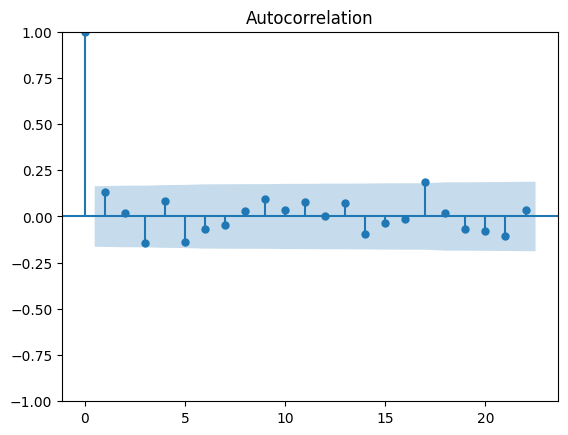

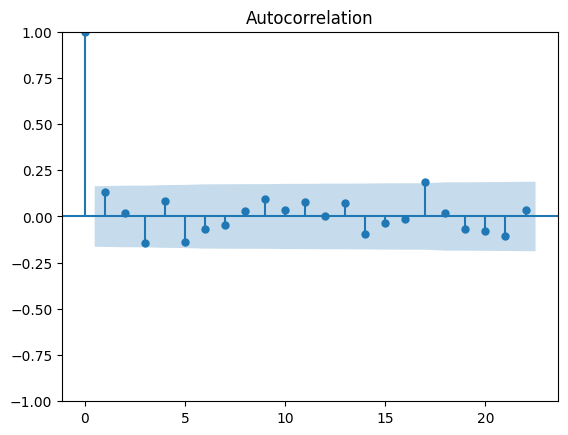

In [101]:
plot_acf(x)

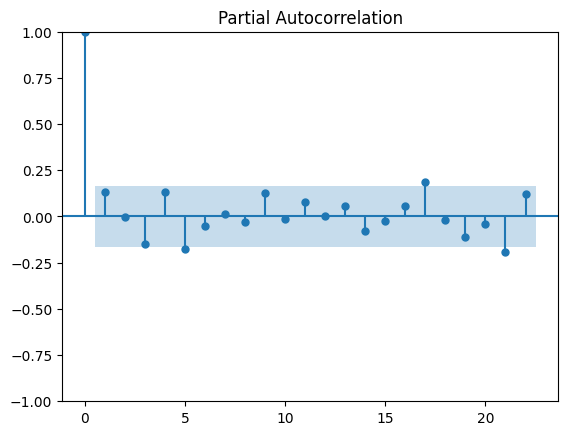

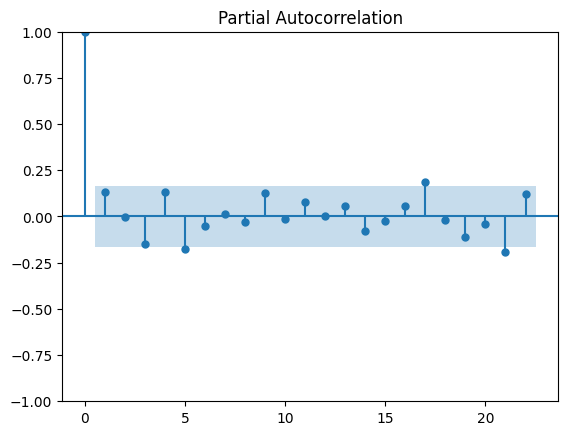

In [102]:
plot_pacf(x)

In [103]:
X = train.loc[(train.Store == 1) & (train.Dept == 2)]

In [104]:
train.loc[(train.Store == 1) & (train.Dept == 2)]

Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     2      50605.27      False
2010-02-12      1     2      44682.74       True
2010-02-19      1     2      47928.89      False
2010-02-26      1     2      44292.87      False
2010-03-05      1     2      48397.98      False
...           ...   ...           ...        ...
2012-09-28      1     2      45784.76      False
2012-10-05      1     2      48577.08      False
2012-10-12      1     2      42112.67      False
2012-10-19      1     2      42354.72      False
2012-10-26      1     2      43134.88      False

[143 rows x 4 columns]

In [105]:
train1 = X.iloc[:100]
train1

Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     2      50605.27      False
2010-02-12      1     2      44682.74       True
2010-02-19      1     2      47928.89      False
2010-02-26      1     2      44292.87      False
2010-03-05      1     2      48397.98      False
...           ...   ...           ...        ...
2011-12-02      1     2      45928.14      False
2011-12-09      1     2      49357.43      False
2011-12-16      1     2      51137.42      False
2011-12-23      1     2      65615.36      False
2011-12-30      1     2      43539.94       True

[100 rows x 4 columns]

In [106]:
test1 = X.loc['2012-01-06':]
test1.shape

(43, 4)

In [107]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train1['Weekly_Sales'], order=(17,1,5))
model_fit = model.fit()

C:\Users\CSC\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\CSC\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\CSC\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\CSC\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [108]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  100
Model:                ARIMA(17, 1, 5)   Log Likelihood                -961.893
Date:                Wed, 19 Jul 2023   AIC                           1969.785
Time:                        20:45:23   BIC                           2029.473
Sample:                    02-05-2010   HQIC                          1993.935
                         - 12-30-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1699      0.847     -0.201      0.841      -1.830       1.490
ar.L2         -0.3720      0.909     -0.409      0.682      -2.154       1.410
ar.L3          0.1285      0.841      0.153      0.879      -1.520       1.777
ar.L4         -0.1736      0.830     -0.209      0.834      -1.801       1.453
ar.L5          0.0708      0.918      0.077      0.938      -1.728       1.869
ar.L6          0.0253      0.587      0.043      0.966      -1.126       1.177
ar.L7         -0.0567      0.452     -0.125      0.900      -0.943       0.829
ar.L8          0.0907      0.426      0.213      0.832      -0.745       0.926
ar.L9         -0.0086      0.324     -0.027      0.979      -0.644       0.627
ar.L10         0.0350      0.330      0.106      0.915      -0.611       0.681
ar.L11         0.1025      0.259      0.395      0.693      -0.406       0.611
ar.L12         0.0390      0.228      0.171      0.864      -0.407       0.485
ar.L13         0.0330      0.206      0.160      0.873      -0.371       0.437
ar.L14        -0.0435      0.210     -0.207      0.836      -0.456       0.369
ar.L15         0.0003      0.177      0.002      0.999      -0.346       0.347
ar.L16         0.0421      0.192      0.219      0.827      -0.335       0.419
ar.L17         0.1601      0.165      0.973      0.331      -0.163       0.483
ma.L1         -0.2505      0.861     -0.291      0.771      -1.939       1.438
ma.L2          0.2597      0.873      0.297      0.766      -1.452       1.971
ma.L3         -0.4785      0.636     -0.752      0.452      -1.726       0.769
ma.L4          0.2559      0.649      0.394      0.693      -1.016       1.528
ma.L5         -0.3331      0.843     -0.395      0.693      -1.985       1.319
sigma2      1.348e+07   2.49e-07   5.41e+13      0.000    1.35e+07    1.35e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.36   Jarque-Bera (JB):               164.77
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -0.60
Prob(H) (two-sided):                  0.03   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.04e+29. Standard errors may be unstable.
"""

In [109]:
pred = model_fit.predict(start = test1.index[0], end = test1.index[-1])

In [110]:
residuals = test1.Weekly_Sales - pred

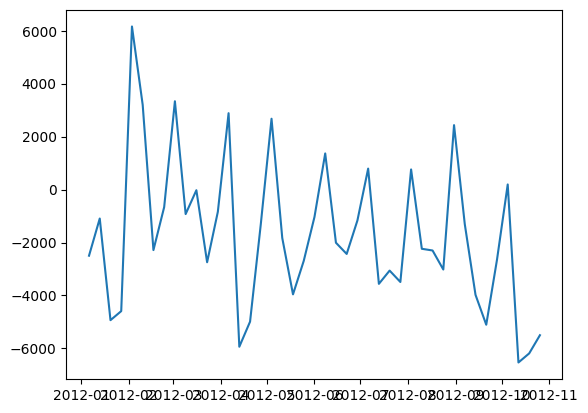

In [111]:
plt.plot(residuals)

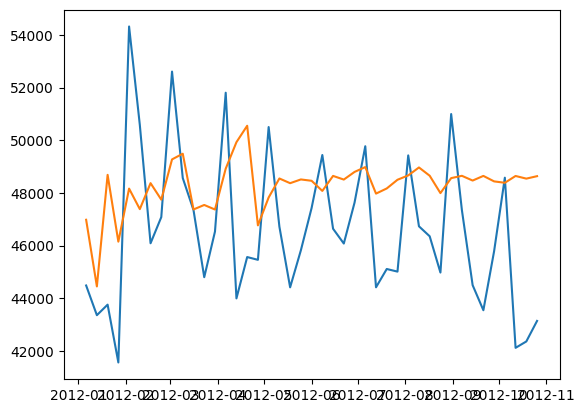

In [112]:
plt.plot(test1.Weekly_Sales)
plt.plot(pred)

In [113]:
round(np.mean(abs(residuals/test1.Weekly_Sales)),4)

0.0614

In [114]:
np.sqrt(np.mean(residuals**2))

3296.231088117441

<Axes: ylabel='Density'>

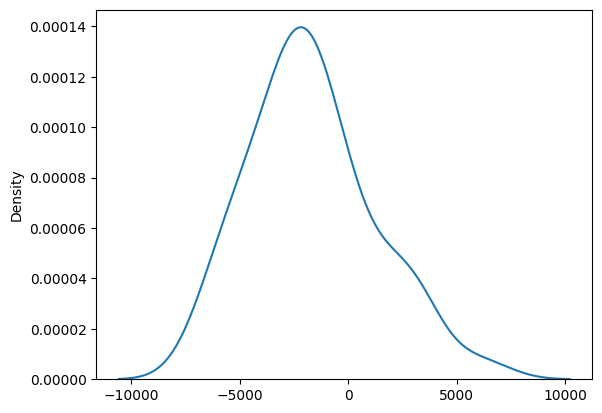

In [115]:
sns.kdeplot(residuals)

In [116]:
from ydata_profiling import ProfileReport

In [117]:
train.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [118]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115064 entries, 2012-11-02 to 2013-07-26
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Store      115064 non-null  int64
 1   Dept       115064 non-null  int64
 2   IsHoliday  115064 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 2.7 MB


In [119]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Temperature   6435 non-null   float64
 2   Fuel_Price    6435 non-null   float64
 3   CPI           6435 non-null   float64
 4   Unemployment  6435 non-null   float64
 5   IsHoliday     6435 non-null   bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 307.9 KB
